In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [68]:
#Load dataset
df = pd.read_csv('Tema_7.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2.0,3.0,12669.0,9656.0,7561.0,214.0,2674.0,1338.0
1,2.0,3.0,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0
2,2.0,3.0,6353.0,8808.0,7684.0,2405.0,3516.0,7844.0
3,1.0,3.0,13265.0,1196.0,4221.0,6404.0,507.0,1788.0
4,2.0,3.0,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0


In [69]:
#Number of rows
len(df)

450

In [70]:
#Nulls
null_values = df.isna()
porcentages = (null_values.sum() / len(df) * 100)
porcentages

Channel             5.111111
Region              4.888889
Fresh               4.666667
Milk                4.888889
Grocery             4.888889
Frozen              5.111111
Detergents_Paper    4.888889
Delicassen          5.111111
dtype: float64

In [71]:
df['Channel'].value_counts(dropna=False)
# 1.0 -> Horeca (hotel, restaurants, café)
# 2.0 -> Retail

Channel
1.0    289
2.0    138
NaN     23
Name: count, dtype: int64

In [72]:
df.loc[df['Channel'].isna() == True, 'Channel'] = 1.0 # Reemplazo por la moda

In [73]:
#Change 'invalid_value' to NaN
df.loc[df['Fresh']== 'invalid_value', 'Fresh'] = np.nan
df['Fresh'] = pd.to_numeric(df['Fresh'], errors='coerce')

In [74]:
for column in ["Fresh" ,"Milk","Grocery","Frozen" ,"Detergents_Paper","Delicassen"]:
    df.loc[df[column].isna() == True, column] = df[column].median() # Reemplazo nulls por mediana de las columnas numéricas
#Uso la mediana porque tienen un rango muy grande y outliers

## Funciones auxiliares

In [75]:
def outliers_finder( column ):
    fresh_stats = df[column].describe() #Estadísticas de la columna Fresh

    #Cálculo de los cuartiles
    Q1 = fresh_stats['25%'] #Cuartil 1
    Q3 = fresh_stats['75%'] #Cuartil 3

    IQR = Q3 - Q1 #Rango intercuartílico, esto es la diferencia entre el cuartil 3 y el cuartil 1

    #Cálculo de los límites
    lower_limit = Q1 - 3 * IQR
    upper_limit = Q3 + 3 * IQR
    
    #Cálculo de los outliers
    return df[(df[column] < lower_limit) | (df[column] > upper_limit)]

In [76]:
def plot_column(df,column):

    # Plot de la columna
    plt.figure(figsize=(8, 6))
    df[column].hist(bins=100)
    plt.title(f'Gráfico de {column}')
    plt.xlabel('Índice')
    plt.ylabel('Valor')
    plt.grid(True)
    plt.show()
    # Cálculo de estadísticas
    mean = df[column].mean()
    std = df[column].std()
    min_value = df[column].min()
    max_value = df[column].max()
    
    print(f"Media: {mean}")
    print(f"Desviación estándar: {std}")
    print(f"Valor mínimo: {min_value}")
    print(f"Valor máximo: {max_value}")

## Análisis y pretratamiento de datos por columna

### Análisis y pretratamiento columna: Region 


In [77]:
df['Region'].value_counts(dropna=False)

# 1.0 -> Lisbon
# 2.0 -> Oporto
# 3.0 -> Other region

Region
3.0    308
1.0     75
2.0     45
NaN     22
Name: count, dtype: int64

In [78]:
df.loc[df['Region'].isna() == True, 'Region'] = 3.0 # Reemplazo por la moda

### Análisis y pretratamiento columna: Fresh 


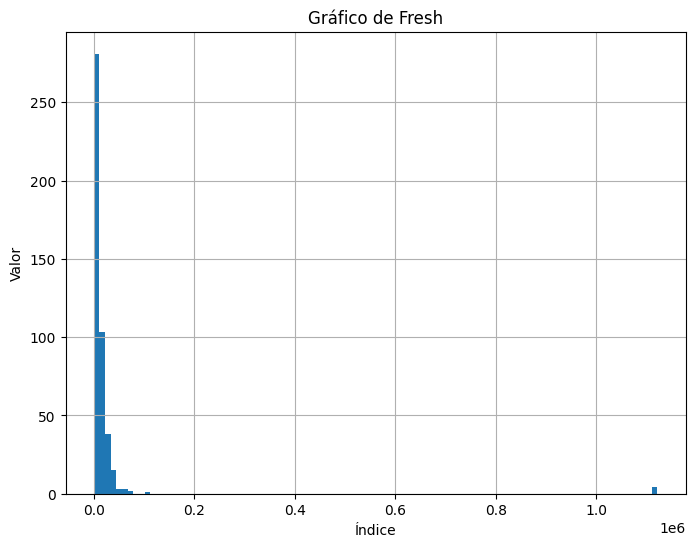

Media: 21620.102222222224
Desviación estándar: 105000.7964474333
Valor mínimo: 3.0
Valor máximo: 1121510.0


In [79]:
plot_column(df,'Fresh') 

In [80]:
df[df['Fresh']>200000] #Se muestran los outliers

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
54,1.0,3.0,1121510.0,1449.0,1947.0,2436.0,204.0,1333.0
154,1.0,3.0,1121510.0,55.0,137.0,75.0,7.0,8.0
230,2.0,1.0,1121510.0,5989.0,5615.0,8321.0,955.0,2137.0
307,1.0,2.0,1121510.0,2374.0,2842.0,1149.0,351.0,925.0


In [81]:

df = df.drop(df[df['Fresh']>200000].index) #Eliminación de outliers

### Análisis y pretratamiento columna: Milk 


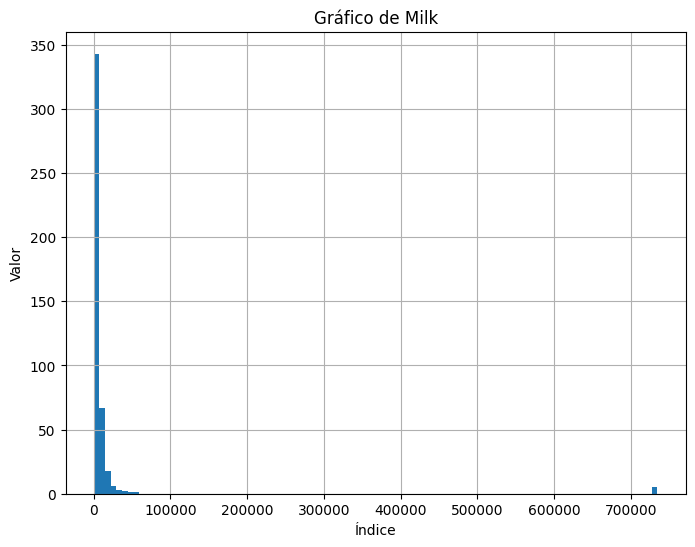

Media: 13783.943946188341
Desviación estándar: 77160.52242101118
Valor mínimo: 112.0
Valor máximo: 734980.0


In [82]:
plot_column(df,'Milk') 

In [83]:
df[df['Milk']>=100000] #Estos tienen pinta de outliers porque los 5 tienen 734980

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
86,2.0,3.0,22925.0,734980.0,32114.0,987.0,20070.0,903.0
209,2.0,3.0,5550.0,734980.0,16767.0,864.0,12420.0,797.0
266,2.0,1.0,572.0,734980.0,22182.0,2221.0,4882.0,2563.0
296,1.0,2.0,19087.0,734980.0,927800.0,3045.0,710.0,898.0
440,2.0,3.0,22925.0,734980.0,32114.0,987.0,20070.0,903.0


In [84]:
df = df.drop(df[df['Milk']>100000].index) #Eliminación de outliers

### Análisis y pretratamiento columna: Grocery 


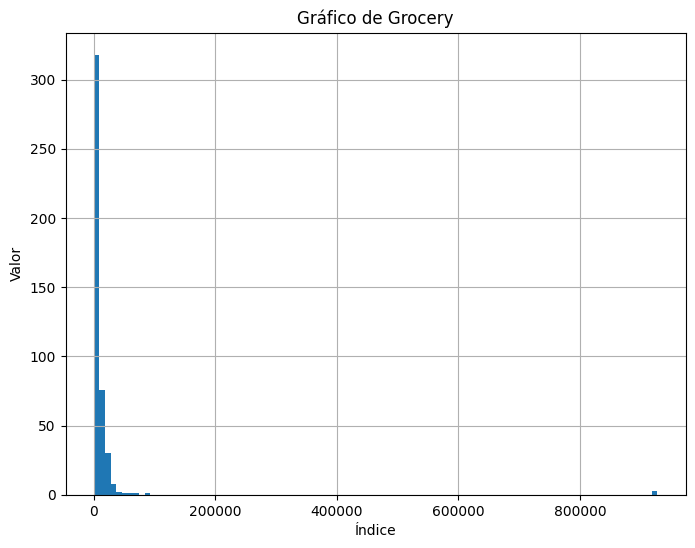

Media: 13975.63492063492
Desviación estándar: 76284.14390178196
Valor mínimo: 3.0
Valor máximo: 927800.0


In [85]:
plot_column(df,'Grocery') 

In [86]:
df[df['Grocery']>=200000] #Estos tienen pinta de outliers porque los 5 tienen 927800

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
6,2.0,3.0,12126.0,3199.0,927800.0,480.0,3140.0,545.0
197,2.0,1.0,2427.0,7097.0,927800.0,1127.0,4314.0,1468.0
430,1.0,3.0,3097.0,4230.0,927800.0,1504.0,241.0,2080.0


In [87]:
df = df.drop(df[df['Grocery']>200000].index) #Eliminación de outliers

### Análisis y pretratamiento columna: Frozen 


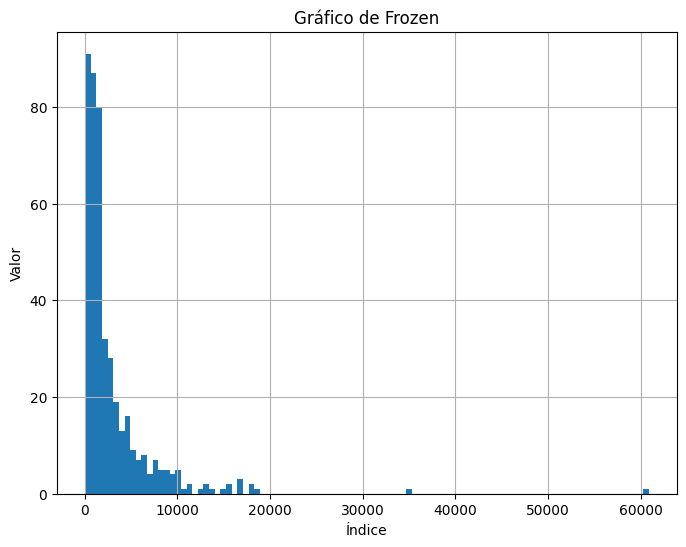

Media: 2943.1575342465753
Desviación estándar: 4563.381788305199
Valor mínimo: 25.0
Valor máximo: 60869.0


In [88]:
plot_column(df,'Frozen') 

In [89]:
df[df['Frozen']>=20000] 
#TODO: Los dejamos y los justificamos por el lugar donde los compran.

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
93,1.0,3.0,11314.0,3090.0,2062.0,35009.0,71.0,2698.0
325,1.0,2.0,32717.0,16784.0,13626.0,60869.0,1272.0,5609.0


### Análisis y pretratamiento columna: Detergents_Paper 


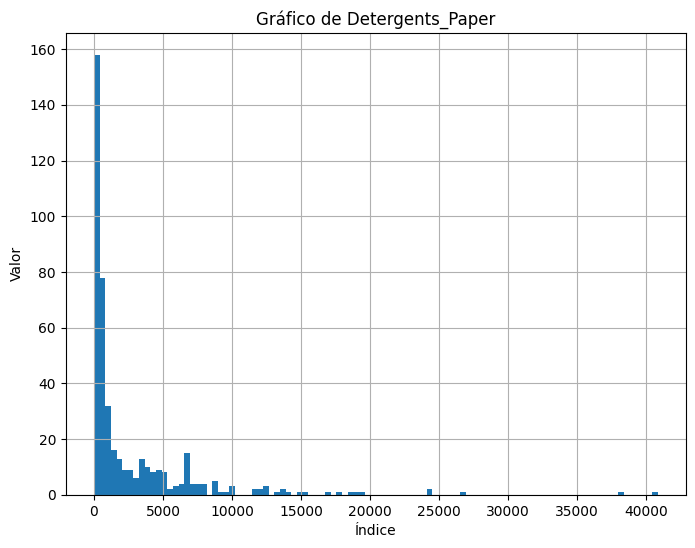

Media: 2691.785388127854
Desviación estándar: 4663.432771788851
Valor mínimo: 3.0
Valor máximo: 40827.0


In [90]:
plot_column(df,'Detergents_Paper') 

In [91]:
df[df['Detergents_Paper']>30000]


#TODO: Checkear el 92780 de Grocery


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
85,2.0,3.0,16117.0,46197.0,92780.0,1026.0,40827.0,2944.0
333,2.0,2.0,8565.0,4980.0,67298.0,131.0,38102.0,1215.0


In [92]:
df = df.drop(df[df['Detergents_Paper']>200000].index) #Eliminación de outliers

### Análisis y pretratamiento columna: Delicassen 


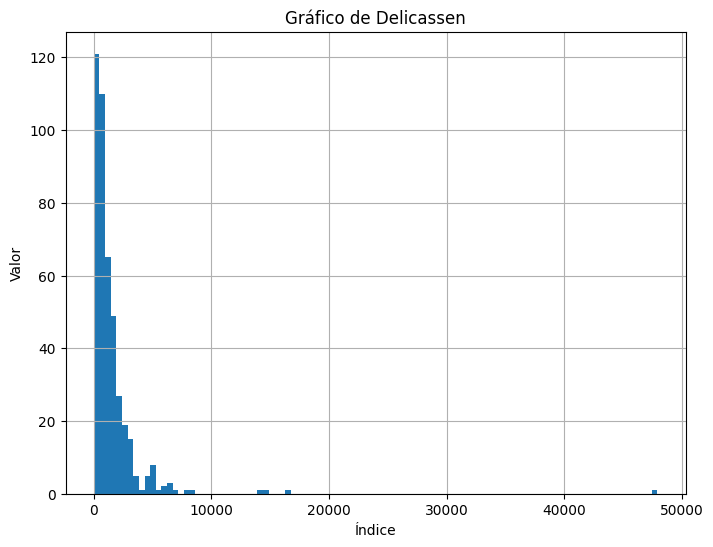

Media: 1512.3698630136987
Desviación estándar: 2822.986011844794
Valor mínimo: 3.0
Valor máximo: 47943.0


In [93]:
plot_column(df,'Delicassen') 

In [94]:
df[df['Delicassen']>20000]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
183,1.0,3.0,36847.0,43950.0,20170.0,1504.0,239.0,47943.0


In [95]:
df = df.drop(df[df['Delicassen']>20000].index) #Eliminación de outliers

In [96]:
for column in ["Channel", "Region", "Fresh" ,"Milk","Grocery","Frozen" ,"Detergents_Paper","Delicassen"]:
    # Cálculo de estadísticas
    mean = df[column].mean()
    std = df[column].std()
    min_value = df[column].min()
    max_value = df[column].max()
    print(f"COLUMN: {column}")
    print(f"    Media: {mean}")
    print(f"    Desviación estándar: {std}")
    print(f"    Valor mínimo: {min_value}")
    print(f"    Valor máximo: {max_value}")

COLUMN: Channel
    Media: 1.299771167048055
    Desviación estándar: 0.458682739780187
    Valor mínimo: 1.0
    Valor máximo: 2.0
COLUMN: Region
    Media: 2.5720823798627004
    Desviación estándar: 0.7587099822954027
    Valor mínimo: 1.0
    Valor máximo: 3.0
COLUMN: Fresh
    Media: 11710.411899313502
    Desviación estándar: 12360.238954544368
    Valor mínimo: 3.0
    Valor máximo: 112151.0
COLUMN: Milk
    Media: 5524.629290617849
    Desviación estándar: 6394.839682169823
    Valor mínimo: 112.0
    Valor máximo: 54259.0
COLUMN: Grocery
    Media: 7688.066361556064
    Desviación estándar: 9328.318386990888
    Valor mínimo: 3.0
    Valor máximo: 92780.0
COLUMN: Frozen
    Media: 2946.450800915332
    Desviación estándar: 4568.090912296917
    Valor mínimo: 25.0
    Valor máximo: 60869.0
COLUMN: Detergents_Paper
    Media: 2697.3981693363844
    Desviación estándar: 4667.296320848093
    Valor mínimo: 3.0
    Valor máximo: 40827.0
COLUMN: Delicassen
    Media: 1406.1212814645

# Normalización de variables

In [97]:
#Normalizar las variables
from sklearn.preprocessing import StandardScaler
# Se inicializa el escalador MinMax
scaler = StandardScaler()

for column in ["Channel", "Region","Fresh" ,"Milk","Grocery","Frozen" ,"Detergents_Paper","Delicassen"]:
    # Se normalizan los datos de la columna
    normalized_column = scaler.fit_transform(df[[column]])
    # Se agregan los datos normalizados al dataframe original
    df[column] = normalized_column

df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.528358,0.564653,0.077643,0.646788,-0.013637,-0.598846,-0.005019,-0.039168
1,1.528358,0.564653,-0.376914,0.670898,0.201761,-0.259585,0.127758,0.212673
2,1.528358,0.564653,-0.433936,0.514029,-0.000436,-0.118665,0.175592,3.701659
3,-0.654297,0.564653,0.125917,-0.677670,-0.372097,0.757759,-0.469846,0.219573
4,1.528358,0.564653,0.883242,-0.017946,-0.052596,0.212268,-0.197428,2.172784


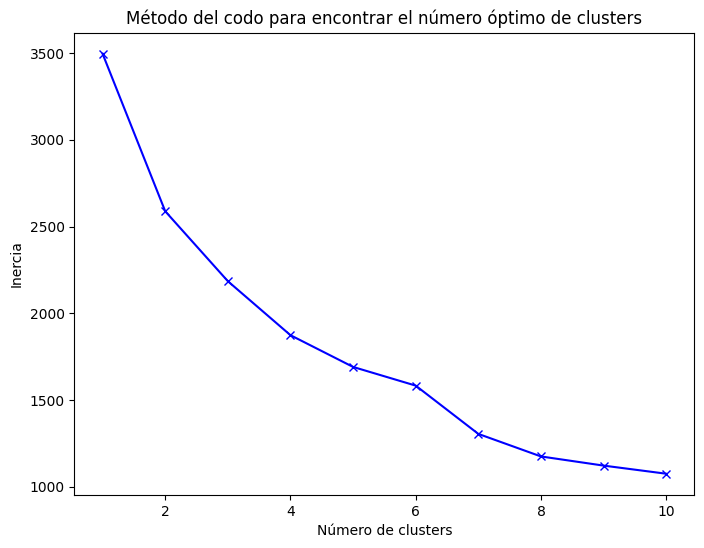

Coeficiente de silueta: 0.34571460855777725


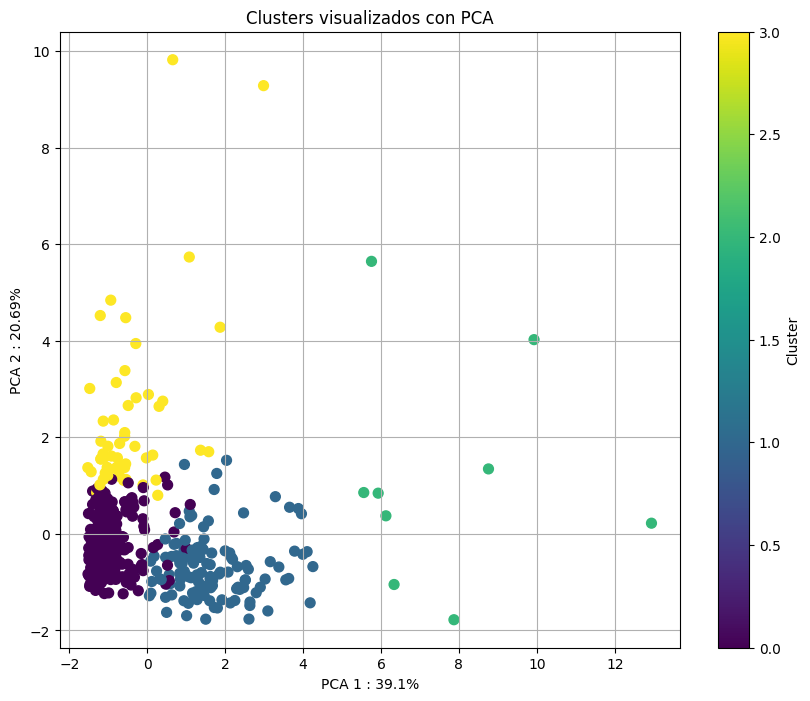

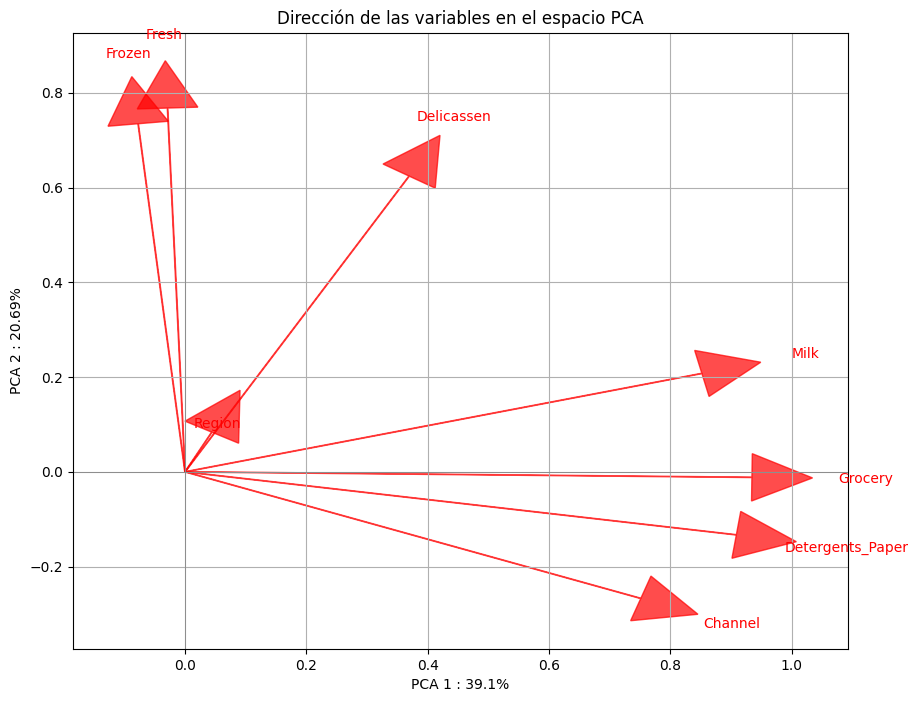

In [107]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import numpy as np

# Suponiendo que tienes tus datos cargados en un DataFrame 'df'
X = df[["Region", "Channel", 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]

# 1. Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Método del codo para determinar el número óptimo de clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Gráfico del método del codo
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del codo para encontrar el número óptimo de clusters')
plt.show()

# 3. Aplicar K-means con el número óptimo de clusters (por ejemplo, 4)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Añadir los clusters al DataFrame original
df['Cluster'] = clusters

# 4. Evaluación con el coeficiente de silueta
silueta = silhouette_score(X_scaled, clusters)
print(f"Coeficiente de silueta: {silueta}")

# 5. Visualización con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot 1: Clusters en el espacio PCA
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50)
plt.xlabel(f'PCA 1 : {round(pca.explained_variance_ratio_[0] * 100, 2)}%')
plt.ylabel(f'PCA 2 : {round(pca.explained_variance_ratio_[1] * 100, 2)}%')
plt.title('Clusters visualizados con PCA')
plt.colorbar(scatter, label="Cluster")
plt.grid()
plt.show()

# Plot 2: Flechas de las variables en el espacio PCA
plt.figure(figsize=(10, 8))
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
for i, var in enumerate(X.columns):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='red', alpha=0.7, head_width=0.1, head_length=0.1)
    plt.text(loadings[i, 0] * 1.2, loadings[i, 1] * 1.2, var, color='red', ha='center', va='center')
plt.xlabel(f'PCA 1 : {round(pca.explained_variance_ratio_[0] * 100, 2)}%')
plt.ylabel(f'PCA 2 : {round(pca.explained_variance_ratio_[1] * 100, 2)}%')
plt.title('Dirección de las variables en el espacio PCA')
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.grid()
plt.show()


In [99]:
# Media de cada característica por cluster
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

          Channel    Region     Fresh      Milk   Grocery    Frozen  \
Cluster                                                               
0       -0.654297 -0.121091 -0.206825 -0.405729 -0.427358 -0.142180   
1        1.528358  0.135804 -0.355161  0.537300  0.645809 -0.348941   
2        1.528358 -0.168423  0.557939  4.007752  4.522073  0.135854   
3       -0.573458  0.295859  1.669098  0.046469 -0.178645  1.421552   

         Detergents_Paper  Delicassen  
Cluster                                
0               -0.400893   -0.250150  
1                0.684937    0.053471  
2                4.552275    1.954291  
3               -0.395111    0.732094  


In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_cluster_by_column(df, column_name, x_axis='index'):
    """
    Genera un gráfico de dispersión que muestra los puntos en función de una columna específica y colorea por cluster.
    
    Parámetros:
    - df: DataFrame con los datos, debe contener una columna 'Cluster' que indica el cluster de cada punto.
    - column_name: str, nombre de la columna que se utilizará en el eje y.
    - x_axis: str, nombre de la columna para el eje x (por defecto, usa el índice).
    """
    # Verificar que el nombre de la columna esté en el DataFrame
    if column_name not in df.columns:
        print(f"La columna '{column_name}' no existe en el DataFrame.")
        return
    
    # Configurar el eje x: índice o columna específica
    x_values = df.index if x_axis == 'index' else df[x_axis]
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x_values, y=df[column_name], hue=df['Cluster'], palette='viridis', s=50)
    
    # Personalización del gráfico
    plt.xlabel(x_axis if x_axis != 'index' else 'Índice')
    plt.ylabel(column_name)
    plt.title(f'Gráfico de dispersión de {column_name} coloreado por Cluster')
    plt.legend(title='Cluster')
    plt.show()

/home/rodrigo/Desktop/Facultad/Analisis_de_datos/env/lib/python3.12/site-packages/sklearn_extra/cluster/_k_medoids.py:252: UserWarning: n_clusters should be larger than 2 if max_iter != 0 setting max_iter to 0.
  warnings.warn(


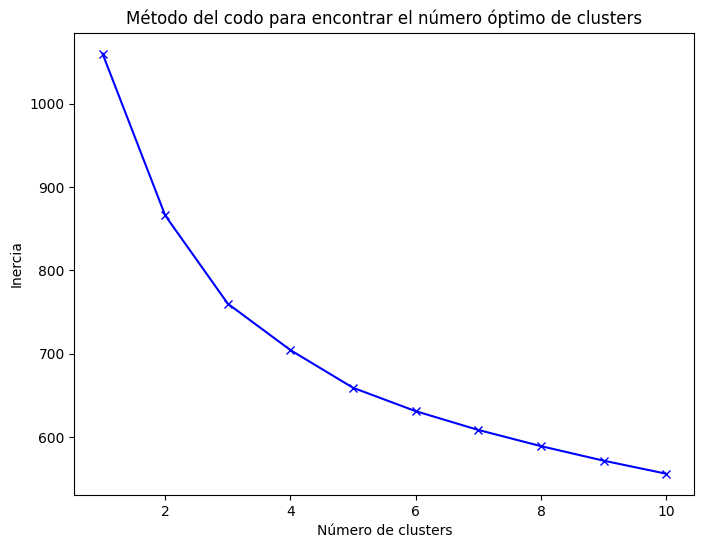

Coeficiente de silueta: 0.25197988988078585


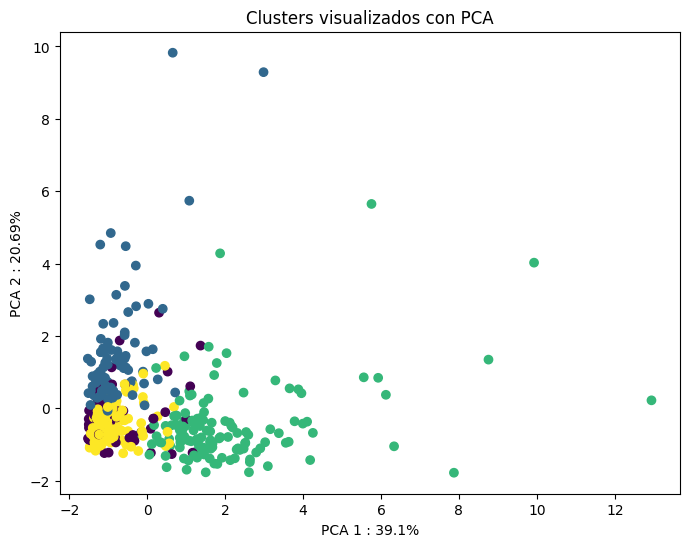

In [44]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Suponiendo que tienes tus datos cargados en un DataFrame 'df'
# Excluyendo las columnas categóricas 'Channel' y 'Region' si es necesario
X = df[['Region','Channel','Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Método del codo para determinar el número óptimo de clusters
inertia = []
K = range(1, 11)
for k in K:
    kmedoids = KMedoids(n_clusters=k, random_state=42, method='pam')
    kmedoids.fit(X_scaled)
    inertia.append(kmedoids.inertia_)

# Gráfico del método del codo
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del codo para encontrar el número óptimo de clusters')
plt.show()

# Aplicar K-medoids con el número óptimo de clusters (por ejemplo, 5)
kmedoids = KMedoids(n_clusters=4, random_state=42, method='pam')
clusters = kmedoids.fit_predict(X_scaled)

# Añadir los clusters al DataFrame original
df['Cluster'] = clusters

# Evaluación con el coeficiente de silueta
silueta = silhouette_score(X_scaled, clusters)
print(f"Coeficiente de silueta: {silueta}")

# Visualización opcional con PCA para ver los clusters
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel(f'PCA 1 : {round(pca.explained_variance_ratio_[0] * 100, 2)}%')
plt.ylabel(f'PCA 2 : {round(pca.explained_variance_ratio_[1] * 100, 2)}%')
plt.title('Clusters visualizados con PCA')
plt.show()



##### ¿Cómo varía el gasto anual promedio entre las diferentes regiones (Lisbon, Oporto y otras)? Utilizar un gráfico de barras para mostrar el gasto promedio en cada categoría por región, facilitando la comparación de patrones de consumo.

##### ¿Existen diferencias significativas en el gasto anual entre los canales (Horeca y Retail)? Comparar el gasto en cada categoría según el canal usando un gráfico de barras o boxplot para resaltar diferencias en patrones de consumo entre Horeca y Retail.


##### ¿Cómo se distribuye el gasto en productos frescos en relación con otros productos? Crear un gráfico de dispersión (scatter plot) comparando FRESH con cada una de las otras categorías, para analizar si existe correlación entre el gasto en productos frescos y otras categorías.

##### ¿Cuál es la proporción de gasto en cada categoría de productos en cada región? Usar un gráfico de pastel o un gráfico de áreas apiladas para representar la proporción de cada categoría en el gasto total por región.

##### ¿Cuál es la distribución del gasto anual en cada categoría de productos? Crear un histograma o boxplot para cada categoría (FRESH, MILK, GROCERY, FROZEN, DETERGENTS_PAPER, DELICATESSEN) para visualizar la dispersión del gasto y detectar posibles outliers.

##### ¿Qué región tiene una mayor proporción de clientes en Horeca vs. Retail? Visualizar la frecuencia de clientes por canal y región con un gráfico de barras apiladas o un mosaico para analizar el predominio de Horeca o Retail en cada región.

##### ¿Existen correlaciones entre las categorías de gasto? Crear una matriz de correlación con un heatmap para observar las relaciones entre las distintas categorías de productos y detectar patrones de consumo.

##### ¿Cómo varía el gasto en Delicatessen entre regiones y canales? Comparar el gasto promedio en Delicatessen para cada combinación de región y canal usando un gráfico de barras o un boxplot, para explorar diferencias en este tipo de productos.

##### ¿Cuál es la variación del gasto promedio en productos de cada tipo en función de la desviación estándar? Representar la media y la desviación estándar de cada categoría en un gráfico de barras para visualizar el nivel de variabilidad de cada tipo de producto.

In [488]:
# Gasto promedio anual por región

